# Version 3

In [1]:
import pandas as pd
from collections import defaultdict

def open_file(filename):
    data = pd.read_csv(filename)
    return data

In [2]:
def create_equivalence_classes(dataset):
    equivalence_classes = {}
    for idx, row in dataset.iterrows():
        key = f"X{idx + 1}"
        equivalence_classes[key] = [row["timestamps"]]
    return equivalence_classes

In [3]:
def calculate_probabilities(equivalence_classes, dataset):
    positive_classes = []
    negative_classes = []
    uncertain_classes = []
    i=0
    for key, values in equivalence_classes.items():
        i+=1
        count_changepoint_1 = sum(dataset[dataset["changepoint"] == 1]["timestamps"].isin(values))
        probability = count_changepoint_1 / len(values)
        class_name = f"X{i}"
        class_info = (class_name, probability)

        if probability <= 0.25:
            negative_classes.append(class_info)
        elif probability >= 0.75:
            positive_classes.append(class_info)
        else:
            uncertain_classes.append(class_info)

    return positive_classes, negative_classes, uncertain_classes

In [4]:
def print_equivalence_classes(equivalence_classes):
    print("Equivalence Classes:")
    for idx, (key, values) in enumerate(equivalence_classes.items(), start=1):
        class_name = f"X{idx}"
        print(f"Class: {class_name} = {key}")

In [5]:
def print_classification_results(positive, negative, uncertain):
    print("Positive Classes:")
    for item in positive:
        print(f"Class: {item[0]}, Probability: {item[1]}")

    print("\nNegative Classes:")
    for item in negative:
        print(f"Class: {item[0]}, Probability: {item[1]}")

    print("\nUncertain Classes:")
    for item in uncertain:
        print(f"Class: {item[0]}, Probability: {item[1]}")

In [6]:
# Example usage:
filename = './dataset/A4Benchmark/A4Benchmark-TS1.csv'
data = open_file(filename)
# data = data.head(10)
equivalence_classes = create_equivalence_classes(data)
positive, negative, uncertain = calculate_probabilities(equivalence_classes, data)

# Print equivalence classes
# print_equivalence_classes(equivalence_classes)

# Print classification results
print_classification_results(positive, negative, uncertain)

Positive Classes:
Class: X720, Probability: 1.0
Class: X960, Probability: 1.0

Negative Classes:
Class: X1, Probability: 0.0
Class: X2, Probability: 0.0
Class: X3, Probability: 0.0
Class: X4, Probability: 0.0
Class: X5, Probability: 0.0
Class: X6, Probability: 0.0
Class: X7, Probability: 0.0
Class: X8, Probability: 0.0
Class: X9, Probability: 0.0
Class: X10, Probability: 0.0
Class: X11, Probability: 0.0
Class: X12, Probability: 0.0
Class: X13, Probability: 0.0
Class: X14, Probability: 0.0
Class: X15, Probability: 0.0
Class: X16, Probability: 0.0
Class: X17, Probability: 0.0
Class: X18, Probability: 0.0
Class: X19, Probability: 0.0
Class: X20, Probability: 0.0
Class: X21, Probability: 0.0
Class: X22, Probability: 0.0
Class: X23, Probability: 0.0
Class: X24, Probability: 0.0
Class: X25, Probability: 0.0
Class: X26, Probability: 0.0
Class: X27, Probability: 0.0
Class: X28, Probability: 0.0
Class: X29, Probability: 0.0
Class: X30, Probability: 0.0
Class: X31, Probability: 0.0
Class: X32, P

# Version 4
Failed

# Version 5
Failed

# Version 6

In [20]:
import pandas as pd

def open_file(filename):
    return pd.read_csv(filename)

In [21]:
# Function to create equivalence classes
def create_equivalence_classes(dataset, columns):
    equivalence_classes = {}
    for idx, row in dataset.iterrows():
        key = tuple(row[columns].values)
        if key not in equivalence_classes:
            equivalence_classes[key] = []
        equivalence_classes[key].append(idx)
    return equivalence_classes

1. Initializes an empty dictionary named `equivalence_classes` to store equivalence classes.

2. Iterates through each row in the dataset using `dataset.iterrows()`.

3. For each row:
    - Extracts values from specified columns (`columns`) in the current row and converts them into a tuple, assigning it to the variable `key`.
    - Checks if the `key` is already present in the `equivalence_classes` dictionary.
    - If not present, creates a new key-value pair with an empty list as the value.
    - Appends the index of the current row to the list corresponding to the `key` in the `equivalence_classes` dictionary.

4. Returns the `equivalence_classes` dictionary containing lists of indices grouped by equivalence.

The code snippet is written in Python and is primarily used for grouping rows of a dataset based on the equivalence of values in specified columns.


In [22]:
# Function to calculate probabilities and classify them
def calculate_probabilities(equivalence_classes, dataset, condition_column, condition_value):
    positive = []
    negative = []
    uncertain = []
    i=0
    for key, indices in equivalence_classes.items():
        i+=1
        probability = calculate_conditional_probability(dataset.iloc[indices], condition_column, condition_value)
        class_name = f"X{i}"
        if probability >= 0.75:
            # class_info = (class_name, probability)

            positive.append((class_name, probability, key))
        elif probability <= 0.25:
            negative.append((class_name, probability, key))
        else:
            uncertain.append((class_name, probability, key))
            
    return positive, negative, uncertain

1. Initializes empty lists `positive`, `negative`, and `uncertain` to store class information.

2. Iterates through each equivalence class in the `equivalence_classes` dictionary.

3. Calculates the conditional probability based on the subset of the dataset specified by the indices of the current equivalence class.

4. Assigns a class name based on a counter variable `i`.

5. Classifies the equivalence class based on the calculated probability:
   - If the probability is greater than 0.74, the class is considered positive.
   - If the probability is less than 0.25, the class is considered negative.
   - Otherwise, the class is considered uncertain.

6. Appends tuples containing the class name, probability, and key to the respective lists (`positive`, `negative`, or `uncertain`).

7. Returns the lists of positive, negative, and uncertain class information.

The code snippet appears to be part of a classification or clustering algorithm, where equivalence classes are examined based on some condition, and they are classified into positive, negative, or uncertain classes depending on the calculated conditional probability.


In [23]:
# Function to print equivalence classes
def print_equivalence_classes(equivalence_classes):
    for idx, key in enumerate(equivalence_classes.keys(), start=1):
        print(f"Class X{idx}: {key}")

In [24]:
def print_classification_results(positive, negative, uncertain):
    print("Positive Classes:")
    for item in positive:
        print(f"Class: {item[0]}, Probability: {item[1]}, Key: {item[2]}")

    print("\nNegative Classes:")
    for item in negative:
        print(f"Class: {item[0]}, Probability: {item[1]}, Key: {item[2]}")

    print("\nUncertain Classes:")
    for item in uncertain:
        print(f"Class: {item[0]}, Probability: {item[1]}, Key: {item[2]}")

In [25]:
# Function to calculate conditional probability
def calculate_conditional_probability(class_data, condition_column, condition_value):
    intersection_count = len(class_data[class_data[condition_column] == condition_value])
    total_count = len(class_data)
    probability = intersection_count / total_count
    return probability

- `class_data`: This parameter represents a DataFrame containing data of a specific class.

- `condition_column`: This parameter is a string indicating the column name that holds the condition we are interested in.

- `condition_value`: This parameter represents the value of the condition for which we want to calculate the probability.

- `intersection_count`: This variable calculates the number of occurrences where the condition is met within the class data. It does so by filtering the `class_data` DataFrame to include only rows where the value in the `condition_column` matches the `condition_value`. The length of this filtered DataFrame is then computed using the `len()` function.

- `total_count`: This variable calculates the total count of data points in the class data DataFrame by simply finding its length using the `len()` function.

- `probability`: This variable computes the conditional probability of the condition within the class data. It does so by dividing the `intersection_count` (i.e., the number of occurrences where the condition is met) by the `total_count`.

- Finally, the calculated conditional probability is returned as the output of the function.

In summary, this function takes in a DataFrame representing a class dataset, a condition column, and a condition value. It then calculates the probability of the specified condition occurring within the class dataset.


In [50]:
import numpy as np  
import matplotlib.pyplot as plt  

def graph( positive, negative, uncertain):
    fig, ax = plt.subplots()
    ax.bar("positive", len(positive), color='blue')
    ax.bar("negative", len(negative),bottom = len(positive), color='red')
    ax.bar("uncertain", len(uncertain),bottom = [len(positive)+len(negative)], color='green')

    ax.set_xlabel("classes")
    ax.set_ylabel("length")
    plt.show()
    

In [51]:
# Main function
def main():
    # Read the CSV file
    df = open_file("./dataset/A4Benchmark/A4Benchmark-TS1.csv")

    # Make equivalence classes based on seasonality1, seasonality2, seasonality3
    equivalence_classes = create_equivalence_classes(df, ['seasonality1', 'seasonality2', 'seasonality3'])

    # Calculate conditional probabilities and classify them
    positive, negative, uncertain = calculate_probabilities(equivalence_classes, df, 'changepoint', 1)

    # Print equivalence classes
    # print_equivalence_classes(equivalence_classes)

    # Print classification results
    # print_classification_results(positive, negative, uncertain)

    graph( positive, negative, uncertain)

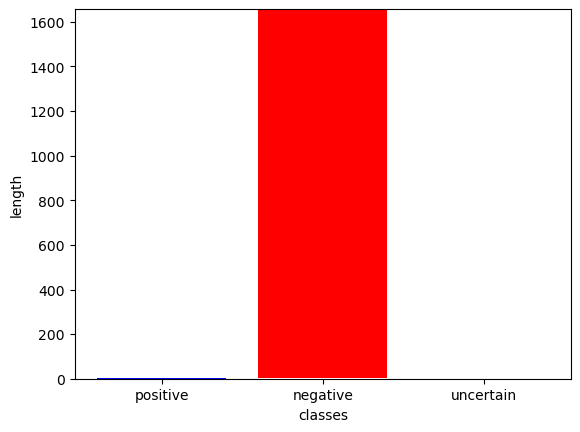

In [52]:
if __name__ == "__main__":
    main()

In [12]:
test = pd.read_csv("./dataset/A4Benchmark/A4Benchmark-TS1.csv")

In [19]:
test['anomaly'].value_counts()[1]

13

In [18]:
hello

0       False
1       False
2       False
3       False
4       False
        ...  
1675    False
1676    False
1677    False
1678    False
1679    False
Name: anomaly, Length: 1680, dtype: bool